## Ejercicio de codificación #0801

### 1. Modelo de API secuencial en Keras:

In [1]:
# Instalar si es necesario una única vez
# !pip install keras

In [2]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                              # Desactivar las advertencias.
%matplotlib inline

Using TensorFlow backend.


#### 1.1. Leer los datos y explorar:

In [3]:
# Ir al directorio que contiene el fichero 
# os.chdir(r'~~')                # Reemplazar por la ruta adecuada.   

In [4]:
# Leer.
df = pd.read_csv('data_boston.csv', header='infer',encoding = 'latin1')
X = df.drop(columns=['PRICE'])
y = df['PRICE']

In [5]:
# Visualizar.
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# Escalar los datos X.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
# Dividir los datos en entrenamiento y pruebas.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
n_vars = X_train.shape[1]

#### 1.2. Definir un modelo del API secuencial

In [8]:
# Añadir capas al objeto Sequential
my_model1 = Sequential()
my_model1.add(Dense(input_dim = n_vars, units = 1, activation="linear"))    # Añadir una capa de salida para regresión lineal.

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# Resumen del modelo.
my_model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Definir los hiperparámetros y el optimizador:

In [10]:
# Hiperparámetros.
n_epochs = 2000
batch_size = 10
learn_rate = 0.002

In [11]:
# Definir el optimizador y complilar.
my_optimizer=Adam(lr=learn_rate)
my_model1.compile(loss = "mae", optimizer = my_optimizer, metrics=["mse"])

#### 1.4. Entrenar el modelo y visualizar la historia:

In [12]:
# Entrenar el modelo.
# verbose = 0 significa sin salida. verbose = 1 para ver las épocas.
my_summary = my_model1.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)

Instructions for updating:
Use tf.cast instead.


In [13]:
# Visualizar las claves.
my_summary.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])

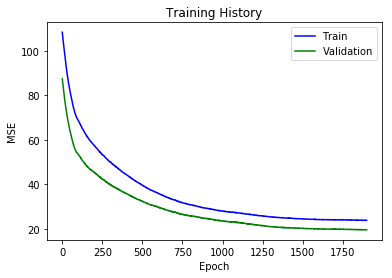

In [16]:
# Visualizar el historial de entrenamiento.
n_skip = 100                 # Omitir los primeros pasos.
plt.plot(my_summary.history['mean_squared_error'][n_skip:], c="b")
plt.plot(my_summary.history['val_mean_squared_error'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### 1.5. Pruebas: 

In [17]:
# Predecir y probar usando una fórmula.
y_pred = my_model1.predict(X_test)[:,0]
RMSE = np.sqrt(np.mean((y_test-y_pred)**2))
np.round(RMSE,3)

5.637

In [18]:
# Usar el método evaluate().
MSE = my_model1.evaluate(X_test, y_test, verbose=0)[1]        # Devuelve 0 = valor de pérdida y 1 = valor de métrica.
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(np.round(RMSE,3)))

Test RMSE : 5.637


### 2. Modelo de API funcional en Keras:

In [19]:
from keras.models import Model
from keras.layers import Input, Dense

#### 2.1. Definir un modelo del Api funcional:

In [20]:
my_input = Input(shape=(n_vars,))                                     # Capa de entrada.
my_output = Dense(units=1,activation='linear')(my_input)              # Capa de salida.

In [ ]:
my_model2 = Model(inputs=my_input,outputs=my_output)                   # El modelo.

In [ ]:
# Resumen del modelo.
my_model2.summary()

In [ ]:
# Definir el optimizador y compilar.
my_optimizer=Adam(lr=learn_rate)
my_model2.compile(loss = "mae", optimizer = my_optimizer, metrics=["mse"])    # Loss = MAE (L1) and Metrics = MSE (L2). 

#### 2.2. Entrenar el modelo y visualizar la historia:

In [ ]:
# Entrenar el modelo.
my_summary = my_model2.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)

In [ ]:
# Visualizar el historial de entrenamiento.
n_skip = 100                 # Omitir los primeros pasos.
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Usar el método evaluate().
MSE = my_model2.evaluate(X_test, y_test, verbose=0)[1]        # Devuelve 0 = valor de pérdida y 1 = valor de métrica.
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(np.round(RMSE,3)))